In [3]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from scipy.stats import entropy



In [4]:
# read dataframe
Rawdata = pd.read_csv('sizes3 (with class label).csv', header = 0)
Rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   class   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
# feature為所有特徵資料
df = Rawdata
feature = df.drop('class', axis=1)
ground_true = df['class']
feature.head()



,x,y
0,9.28531,14.58790
1,12.39770,8.44890
2,8.73624,11.68030
3,9.10197,12.83270
4,12.29480,8.67373


In [9]:
from sklearn import preprocessing

numerical_columns = ["x", "y"]

scaler = preprocessing.MinMaxScaler()
feature[numerical_columns] = scaler.fit_transform(feature[numerical_columns])

feature.head(6)

,x,y
0,0.691773,0.908751
1,0.835630,0.638735
2,0.666394,0.780864
3,0.683299,0.831551
4,0.830874,0.648624
5,0.772275,0.736841


### KMEANS


In [7]:
from sklearn.cluster import KMeans

model_kmean = KMeans(n_clusters = 4, random_state = 1, init='k-means++') #分4群
model_kmean.fit_predict(feature) #建立模型
pred_kmeans = model_kmean.labels_
pred_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
from collections import Counter
pred_c = Counter(pred_kmeans)

pred  = sorted(pred_c)
print("predict    ：", pred_c1)

acc_c = Counter(ground_true)
print("ground_true：", acc_c)

NameError: name 'pred_c1' is not defined

In [ ]:
acc_kmeans = accuracy_score(ground_true, pred_kmeans)
entr_kmeans = entropy(ground_true, pred_kmeans)
sse_kmeans =  model_kmean.inertia_


print("----------------【KMEANS】----------------")
print("Accuracy：", acc_kmeans)
print("Entropy ：", entr_kmeans) #Q
print("SSE     ：", sse_kmeans)

----------------【KMEANS】----------------
Accuracy： 0.76
Entropy ： 0.1207515194342445
SSE     ： 16.977270172139374


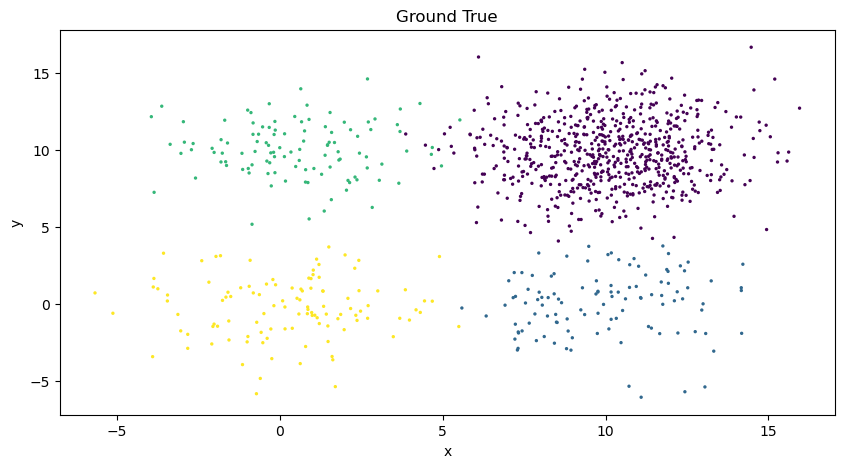

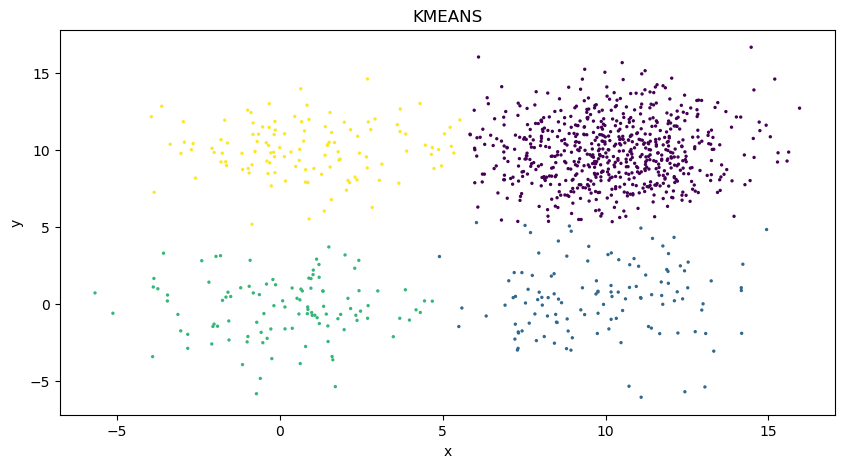

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], c = df['class'], s = 2) 
plt.title("Ground True")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], c = pred_kmeans, s = 2) 
plt.title('KMEANS')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN(eps = 1, min_samples = 7)
model_dbscan.fit(feature)
pred_dbscan = model_dbscan.labels_
pred_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
acc_dbscan = accuracy_score(ground_true, pred_dbscan)
#entr_dbscan = entropy(ground_true, pred_kmeans)

print("----------------【DBSCAN】----------------")
print("Accuracy：", acc_dbscan)
# print("Entropy ：", entr_dbscan)
# print("SSE     ：", sse_dbscan)

----------------【DBSCAN】----------------
Accuracy： 0.883


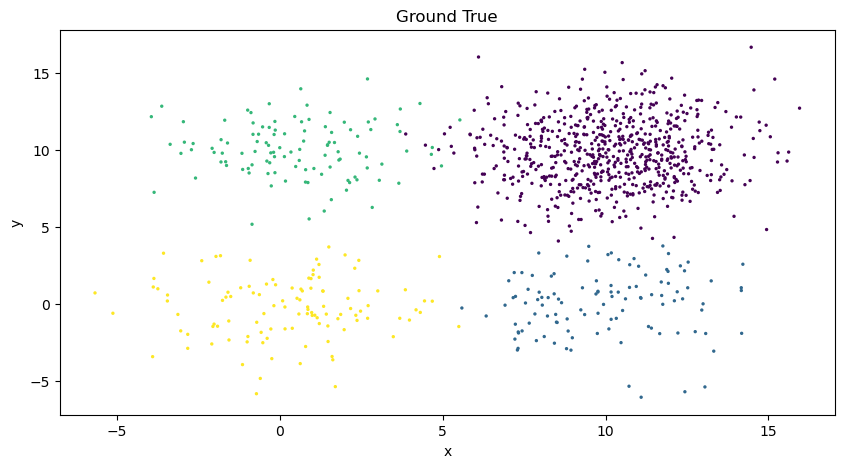

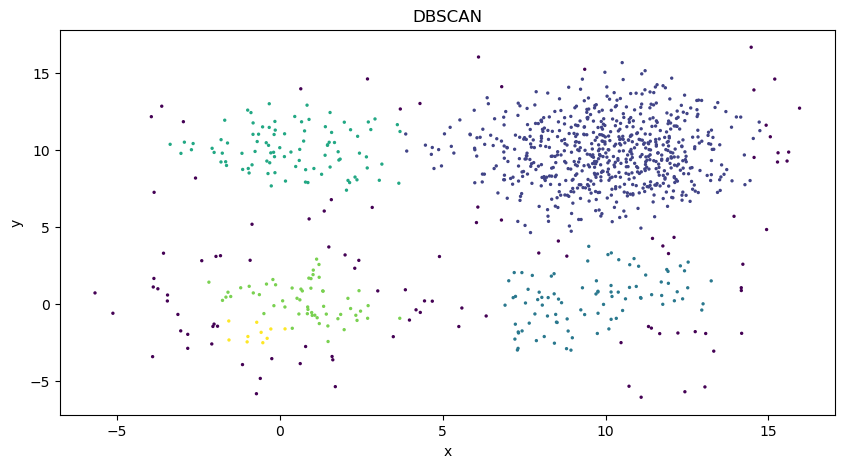

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], c = df['class'], s = 2) 
plt.title("Ground True")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], c = pred_dbscan, s = 2) 
plt.title('DBSCAN')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Hierarchical Clustering


In [ ]:
from sklearn.cluster import AgglomerativeClustering

model_H = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')
pred_H = model_H.fit_predict(feature)
#affinity: 距離的計算方式，”euclidean”,”l1″,”l2″,”manhattan”,”cosine”
#linkage: 群與群之間的距離，”ward”,”complete”,”average”,”single”

In [ ]:
acc_H = accuracy_score(ground_true, pred_H)
#entr_H = entropy(ground_true, pred_H)
# sse_H =  model_H


print("----------------【Hierarchical Clustering】----------------")
print("Accuracy：", acc_H)
#print("Entropy ：", entr_H)
#print("SSE     ：", sse_H)

----------------【Hierarchical Clustering】----------------
Accuracy： 0.769


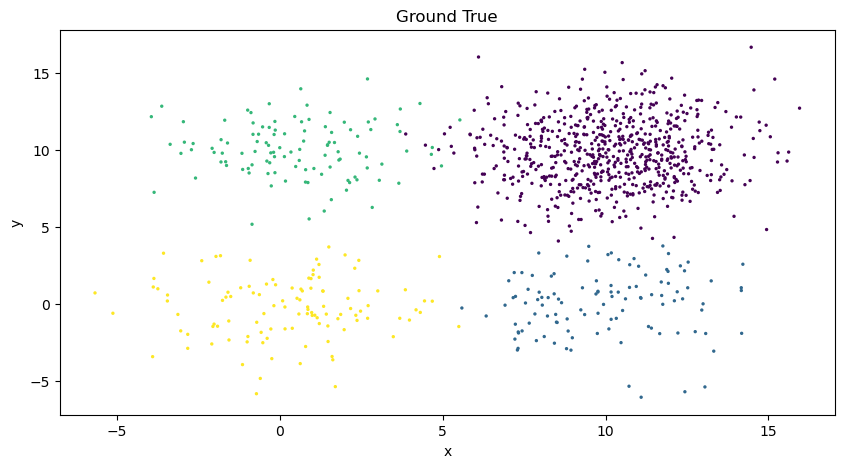

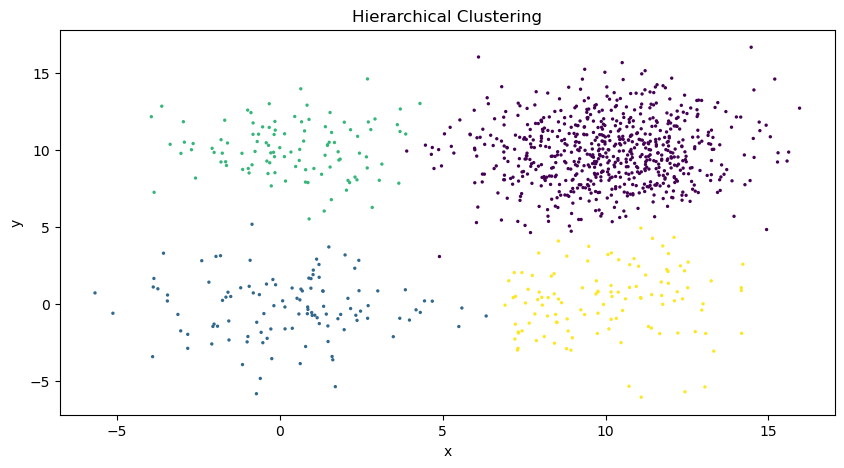

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], c = df['class'], s = 2) 
plt.title("Ground True")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], c = pred_H, s = 2) 
plt.title('Hierarchical Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

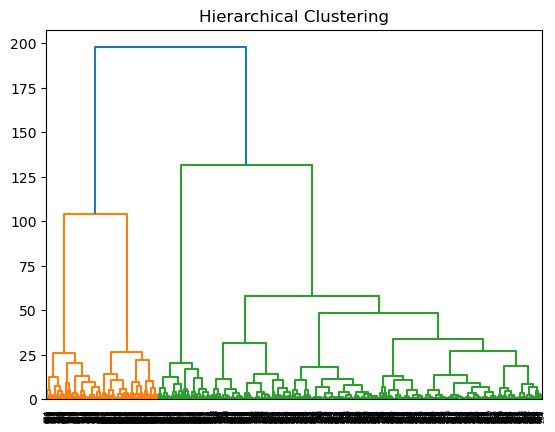

In [ ]:
import scipy.cluster.hierarchy as sch
dis = sch.linkage(feature, method='ward')

sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()

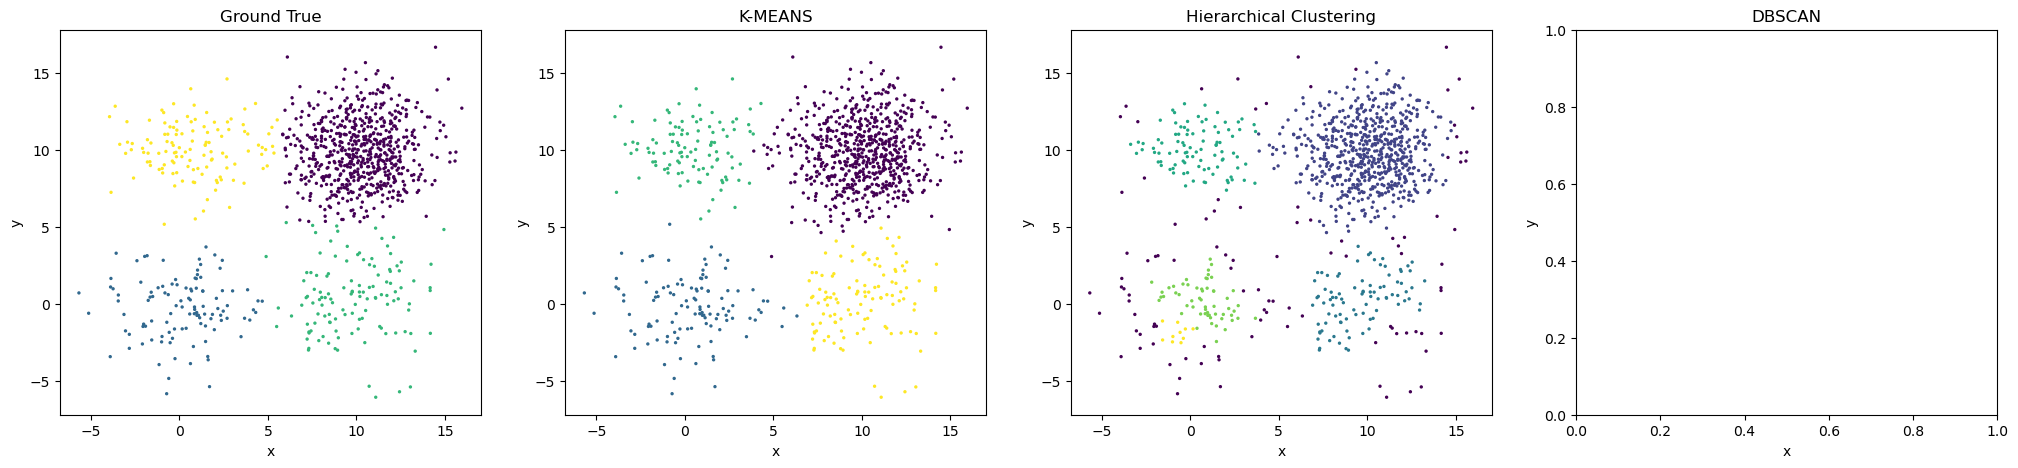

In [ ]:
plt.figure(figsize=(25, 5))

plt.scatter(df['x'], df['y'], c = df['class'], s = 2)
plt.subplot(1, 4, 1) 
plt.title('Ground True')
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(df['x'], df['y'], c = pred_kmeans, s = 2)
plt.subplot(1, 4, 2) 
plt.title('K-MEANS')
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(df['x'], df['y'], c = pred_H, s = 2)
plt.subplot(1, 4, 3) 
plt.title('Hierarchical Clustering')
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(df['x'], df['y'], c = pred_dbscan, s = 2) 
plt.subplot(1, 4, 4) 
plt.title('DBSCAN')
plt.xlabel('x')
plt.ylabel('y')

plt.show()
